# Linear Regression I

In this Lab, firstly, you need to learn how to calculate <b>gradients</b>, and then practice training a linear regression model by using <b>Batch Gradient Descent (GD)</b>. Then, you will study the effect of the learning rate. Thirdly, you need to reimplement the training method to support <b>Stochastic GD</b> and <b>Mini-batch GD</b> and <b>Batch GD</b>, and train the model by using different GDs and get the feeling of the differences among them.

#### Important Packages

In [3]:
import numpy as np
import pandas as pd
from matplotlib import animation
from IPython.display import Image
%matplotlib inline

#### Important Datasets 
https://www.kaggle.com/harlfoxem/housesalesprediction


In [4]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
cols = ['sqft_living', 'price']

df_simple = df.loc[df['zipcode']==98074,cols].head(50)
df_simple['price'] = df_simple['price'].div(1000.0)
df_simple.head(5)

,sqft_living,price
4,1680,510.0
13,1370,400.0
40,2570,625.0
187,1900,560.0
212,2240,592.5


In [6]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 2108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  50 non-null     int64  
 1   price        50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


[Text(0.5, 0, 'Overall Living Area (Sq. Feet)'),
 Text(0, 0.5, 'Property Price ($1000)')]

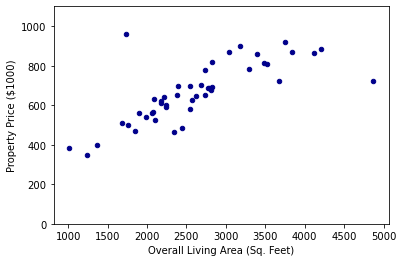

In [7]:
fig1 = df_simple.plot.scatter(x='sqft_living',y='price',c='DarkBlue',ylim=[0,1100])
fig1.set(xlabel='Overall Living Area (Sq. Feet)', ylabel='Property Price ($1000)')

### Gradient Decent (GD)

In [8]:
# Function forward(x) for prediction
def forward(theta, x):
    return np.dot(x,theta)


In [9]:
# Calculate the error between the prediction and the ground truth
def criterion(y_hat, y):
    return np.mean((y-y_hat)**2)

#### TODO: implement gradient method
Make sure that your implementation suits one parameter and two parameters solutions

Double click <b>here</b> to see the solution.
<!--
def gradient(X,Y,theta):
    error = np.dot(X,theta)-Y
    tile_error = np.tile(error,theta.shape[0])
    grad = 2*tile_error*X
    return np.mean(grad,axis=0)
-->

In [10]:
def calculate_gradient(x, y, theta):
    error = np.dot(x, theta) - y
    tile_error = np.tile(error, theta.shape[0])
    grad = 2 * tile_error * x
    return np.mean(grad,axis=0)

<!--
def calculate_gradient(X,Y,theta):
    error = np.dot(X,theta)-Y
    tile_error = np.tile(error,theta.shape[0])
    grad = 2*tile_error*X
    return np.mean(grad,axis=0)
-->

#### Batch Gradient Descent (BGD)

In [11]:
# Define a function for train the model by using BGD
def train_model(x, y, nb_of_iterations, init_theta, learning_rate):
    theta = init_theta

    #Record initial parameter and corresponding gradient and loss
    train_hist = [(theta.flatten(), calculate_gradient(x, y, theta).flatten(), criterion(forward(theta, x),y))]

    for epoch in range (nb_of_iterations): 
        # Compute gradient
        grad = calculate_gradient(x, y, theta)
        grad = grad.reshape(-1,1)
        # Update parameters
        theta = theta - learning_rate * grad.reshape(-1,1)
        # make the prediction using the updated parameters
        y_hat = forward(theta, x)
        # calculate the loss
        loss = criterion(y_hat, y)
        # Store the parameter, the gradient, the loss
        train_hist.append((theta.flatten(), calculate_gradient(x, y, theta).flatten(), loss))
        
    return theta, train_hist


#### Training a one-parameter linear regression model 
$h_\theta (x) = \theta x$

In [12]:
matrix = df_simple.to_numpy()
# col 0 is x
X = matrix[:,0]
X = np.reshape(X,[X.shape[0],1])
# col 1 is y
Y = matrix[:,1]
Y = np.reshape(Y,[Y.shape[0],1])

In [13]:
theta_ini = np.array([[2.4]])
num_iteration = 40
lr = 0.00000002 #learning rate
training_result, training_history = train_model(X, Y, num_iteration, theta_ini, lr)

In [14]:
training_history

[(array([2.4]), array([35500615.8848]), 37715878.4829096),
 (array([1.68998768]), array([23597638.69560716]), 16735634.129698029),
 (array([1.21803491]), array([15685602.57702002]), 7465716.786259834),
 (array([0.90432286]), array([10426387.63047162]), 3369893.77736231),
 (array([0.6957951]), array([6930531.26184104]), 1560194.1329432297),
 (array([0.55718448]), array([4606798.18108616]), 760595.9091195695),
 (array([0.46504852]), array([3062187.97368518]), 407301.1944338134),
 (array([0.40380476]), array([2035469.0649746]), 251201.35365625736),
 (array([0.36309537]), array([1352998.03606848]), 182230.15403768382),
 (array([0.33603541]), array([899352.25108814]), 151755.89888707193),
 (array([0.31804837]), array([597809.05069722]), 138291.14501704497),
 (array([0.30609219]), array([397370.06346858]), 132341.8742019134),
 (array([0.29814479]), array([264136.12700722]), 129713.24663297104),
 (array([0.29286206]), array([175574.10586339]), 128551.81305381219),
 (array([0.28935058]), array

In [15]:
training_result

array([[0.28238924]])

#### The Normal Equation vs. GD
For a linear regression model, a mathematical equation that can give the estimation of $\theta$ directly, $\hat{\theta}=(X^TX)^{-1}X^Ty$, Here, we can compare $\theta$ calculated by GD with the one calculated with the normal equation. If you implement your GD-based solution properly, these values should be close enough.

In [16]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
theta_best

array([[0.28238907]])

#### Visualization
The class <code>visualize_diagram</code> is used to help you visualize the training process. You will see how the parameter(s) changed and how the model fit the data gradually.

In [17]:

def cal_1d_cost_list(theta_list):
    cost_list = []
    for theta in theta_list:
        theta_t = theta.reshape(-1,1)
        y_hat = forward(theta_t, X)
        loss = criterion(y_hat, Y)
        cost_list.append(loss.item())
    return cost_list

class VisualizeDiagram(object):
    
    def __init__(self, x, y, train_hist, theta_list, cost_list):
        self.X = x
        self.Y = y
        self.train_hist = train_hist
        self.theta_list = theta_list
        self.cost_list = cost_list

        self.fig = None
        self.ax1 = None
        self.ax2 = None
        self.line1 = None
        self.line2 = None
        self.pc_dots = None
        self.cost_text = None
        
    def init_fig(self):
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
        
        ax1.plot(self.theta_list, self.cost_list, 'r-', label='cost')
        ax1.set_xlabel(r'parameter: $\theta$', fontsize=15)
        ax1.set_ylabel(r'cost: $\frac{1}{m} \sum |\hat{y}-y|^2$', fontsize=15)
        cost_text = ax1.set_title('Cost at step {}'.format(0), fontsize=18)
        line1, = ax1.plot([], [], 'k:', label=r'derivative at $\theta$')
        pc_dots, = ax1.plot([], [], 'ko')
        ax1.legend(loc=2)
        
        ax2.plot(self.X, self.Y, 'bo', label='target: t')
        ax2.set_xlim([0, 5000])
        ax2.set_ylim([-2000, 4000])
        ax2.set_xlabel('input: $x$', fontsize=15)
        ax2.set_ylabel('target: $y$', fontsize=15)
        ax2.yaxis.set_label_position('right')
        ax2.set_title('Labelled data & model output', fontsize=18)
        line2, = ax2.plot([], [], 'k-', label=r'fitted line: $y=x * \theta$')
        ax2.legend(loc=2)
        
        self.fig = fig
        self.ax1 = ax1
        self.ax2 = ax2
        self.line1 = line1
        self.line2 = line2
        self.pc_dots = pc_dots
        self.cost_text = cost_text
        #return fig, ax1, ax2, line1, line2, pc_dots, cost_text
    
    
    def animation_frame(self,i):        
        """Animate step i"""
        (theta, gradient, cost) = self.train_hist[i]
        self.cost_text.set_text('Cost at step {} = {:.3f}'.format(i, cost))
        thetas_to_i, _, cs_to_i = zip(*self.train_hist[0:i+1])
        self.pc_dots.set_xdata(thetas_to_i)
        self.pc_dots.set_ydata(cs_to_i)
       
        abline_values = [gradient * (ti-theta) + cost for ti in self.theta_list]
        self.line1.set_xdata(self.theta_list)
        self.line1.set_ydata(abline_values)
            
        # Plot fit
        # plot the fitted line
        self.line2.set_xdata([0,5000])
        self.line2.set_ydata([0*theta,5000*theta])
        #print(w)
        self.ax2.legend(loc=2)
        return [self.line1, self.line2, self.pc_dots, self.cost_text]
    
    
    def animation(self):
        return animation.FuncAnimation(self.fig, func=self.animation_frame, frames=len(self.train_hist), interval=50 )
        
        

In [19]:
theta_history = np.linspace(-2.2, 2.8, num=400)  # weight values
cost_history = cal_1d_cost_list(theta_history) #corresponding cost values
vd = VisualizeDiagram(X, Y, training_history, theta_history, cost_history)

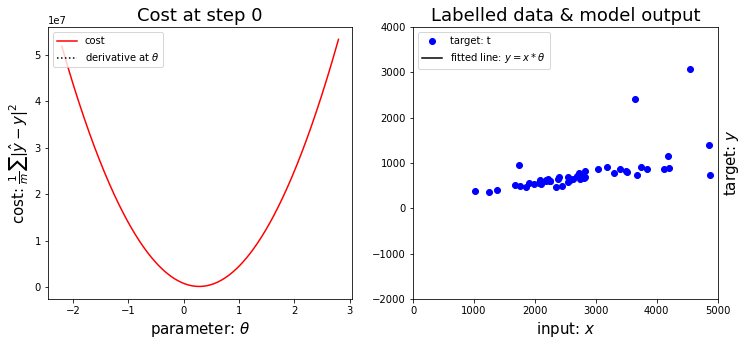

In [20]:
vd.init_fig()

In [21]:
anim = vd.animation()
gif_path = './1d_gradient_descent_24.gif'
anim.save('./1d_gradient_descent_24.gif', writer='imagemagick', fps=0.5)
Image(url=gif_path)

MovieWriter imagemagick unavailable; using Pillow instead.


#### This time, $\theta$ initialization starts from a different value, -2.0, you will see that the linear regression model will still converge at the same point.

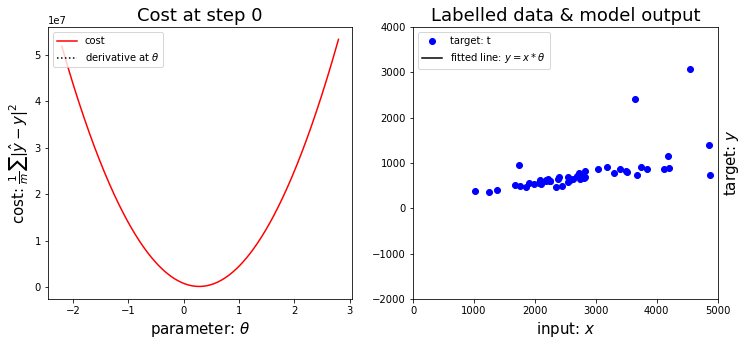

In [76]:
theta2, train_hist2 = train_model(X,Y,40,np.array([[-2.0]]),0.00000002)
vd2 = VisualizeDiagram(X, Y, train_hist2, theta_history, cost_history)
vd2.init_fig()

In [77]:
anim2 = vd2.animation()
gif_path2 = './1d_gradient_descent_-2.gif'
anim2.save('./1d_gradient_descent_-2.gif', writer='imagemagick', fps=0.5)
Image(url=gif_path2)

MovieWriter imagemagick unavailable; using Pillow instead.


In [78]:
theta2

array([[0.28238889]])

#### TODO: Learning Rate (lr)
In the following experiment, I set up $\theta$ starting from 0.2 and $lr=0.0000002$, observing the training history information, think about why it does not converge?

In [79]:
theta3, train_hist3 = train_model(X,Y,10,np.array([[0.2]]), 0.0000002) 

In [80]:
train_hist3

[(array([0.2]), array([-1381208.7872]), 184530.6755496),
 (array([0.47624176]), array([3249836.6968851]), 442627.2044360235),
 (array([-0.17372558]), array([-7646518.50921926]), 1871476.9942611076),
 (array([1.35557812]), array([17991441.03698325]), 9781741.152759768),
 (array([-2.24271009]), array([-42331938.41052966]), 53573803.48346037),
 (array([6.22367759]), array([99602527.99702099]), 296011310.5944675),
 (array([-13.696828]), array([-2.34354106e+08]), 1638171093.1218731),
 (array([33.1739932]), array([5.51410171e+08]), 9068510166.065693),
 (array([-77.10804105]), array([-1.29740922e+09]), 50203656262.419754),
 (array([182.37380213]), array([3.05266526e+09]), 277932192976.1558),
 (array([-428.15924975]), array([-7.18259518e+09]), 1538661553516.2402)]

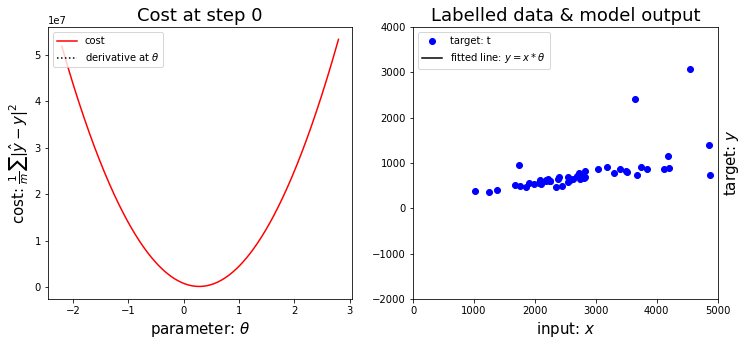

In [81]:

vd3 = VisualizeDiagram(X, Y, train_hist3, theta_history, cost_history)
vd3.init_fig()


In [82]:
anim = vd3.animation()
gif_path3 = './1d_gradient_descent_.2.gif'
anim.save('./1d_gradient_descent_.2.gif', writer='imagemagick', fps=0.5)
Image(url=gif_path3)

MovieWriter imagemagick unavailable; using Pillow instead.


#### Training Two Parameters (BGD)

$h_{\theta_0,\theta_1}(x) = \theta_0+\theta_1 x$

Here we can add $x_0$=1 to each instance, to make the equation consistent and simplify the calculation. 

$h_{\theta_0,\theta_1}(x) = \theta_0 x_0+\theta_1 x_1$

then we can use a vector $\theta$ to represent parameters $\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \end{bmatrix}$, and use a vector x to represent an instance $x=\begin{bmatrix}x_0 \\ x_1\end{bmatrix}$.

Therefore, we will have a unified equation for the linear regression model $h_{\theta}(x) = \theta^T x$.


In [40]:
matrix = df_simple.to_numpy()
X2 = matrix[:,0]
#Feature Scaling: Standardization
X2 = (X2-np.mean(X2))/np.std(X2)
X2 = np.c_[np.ones((X2.shape[0],1)), X2]

Y2 = np.reshape(Y,[Y.shape[0],1])


In [41]:
X2

array([[ 1.        , -1.1877231 ],
       [ 1.        , -1.53145714],
       [ 1.        , -0.20087374],
       [ 1.        , -0.94378281],
       [ 1.        , -0.56678418],
       [ 1.        ,  0.99665132],
       [ 1.        , -0.72201891],
       [ 1.        ,  1.99458887],
       [ 1.        , -0.63331335],
       [ 1.        ,  0.85250478],
       [ 1.        ,  2.34941111],
       [ 1.        ,  1.20732702],
       [ 1.        ,  1.59541385],
       [ 1.        ,  0.70835825],
       [ 1.        ,  2.33832291],
       [ 1.        ,  1.51779648],
       [ 1.        ,  0.47550615],
       [ 1.        , -0.23413833],
       [ 1.        , -0.60004876],
       [ 1.        , -0.76637169],
       [ 1.        ,  0.06524294],
       [ 1.        ,  0.60856449],
       [ 1.        , -1.93063216],
       [ 1.        , -0.22305013],
       [ 1.        , -0.14543277],
       [ 1.        ,  0.04306655],
       [ 1.        , -0.7441953 ],
       [ 1.        ,  0.07633113],
       [ 1.        ,

In [28]:
theta4, train_hist4 = train_model(X2,Y2,40,np.array([[1000],[-250]]),0.1)

In [29]:
train_hist4

[(array([1000, -250]),
  array([  456.66752   , -1041.26730432]),
  450546.0942704013),
 (array([ 954.333248  , -145.87326957]),
  array([ 365.334016  , -833.01384346]),
  334195.6402116095),
 (array([917.7998464 , -62.57188522]),
  array([ 292.2672128 , -666.41107477]),
  259731.34961398275),
 (array([888.57312512,   4.06922225]),
  array([ 233.81377024, -533.12885981]),
  212074.20363150156),
 (array([865.1917481 ,  57.38210824]),
  array([ 187.05101619, -426.50308785]),
  181573.63020271357),
 (array([846.48664648, 100.03241702]),
  array([ 149.64081295, -341.20247028]),
  162053.26320828934),
 (array([831.52256518, 134.15266405]),
  array([ 119.71265036, -272.96197622]),
  149560.22833185777),
 (array([819.55130015, 161.44886167]),
  array([  95.77012029, -218.36958098]),
  141564.6860109416),
 (array([809.97428812, 183.28581977]),
  array([  76.61609623, -174.69566478]),
  136447.53892555524),
 (array([802.31267849, 200.75538625]),
  array([  61.29287699, -139.75653183]),
  133172

In [30]:
theta4

array([[771.69659076],
       [270.56444808]])

In [45]:
theta_best4 = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(Y2)
theta_best4

array([[771.66624   ],
       [270.63365216]])

In [32]:
def plot_error_surfaces(theta_0, theta_1, x, y, train_hist, n_samples = 30):
    print(X.shape)
    t1, t0 = np.meshgrid(
        np.linspace(theta_1[0], theta_1[1], n_samples),
        np.linspace(theta_0[0], theta_0[1], n_samples)
    )
    z = np.zeros((n_samples,n_samples))
    count1 = 0
    for t1_1, t0_1 in zip(t1, t0):
        count2 = 0
        for t1_2, t0_2 in zip(t1_1, t0_1):
            z[count1, count2] = criterion(forward([[t1_2], [t0_2]], x), y)
            count2 += 1
        count1 += 1
        
    plt.figure(figsize=(7.5, 5))
    ax = plt.axes(projection='3d')
    ax.plot_surface(t1, t0, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.7)
    plt.title('Cost/Total Loss Surface')
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_0$')
    theta_hists, _, costs = zip(*train_hist)
    theta0s, theta1s = zip(*theta_hists)
          
    ax.scatter(theta1s, theta0s, costs, c='r', marker='x', s=100, alpha=1)
        
    plt.show()

    theta_hists,_,_ = zip(*train_hist)
           
    #plt.scatter(theta0s, theta1s, c = 'r', marker = 'x')
    plt.plot(np.array(theta_hists)[:, 0], np.array(theta_hists)[:, 1], "r-o", linewidth=0.5)
    

    plt.title('Cost/Total Loss Surface Contour')
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_0$')
    plt.contour(t1, t0, z)
    plt.show()

(50, 2)


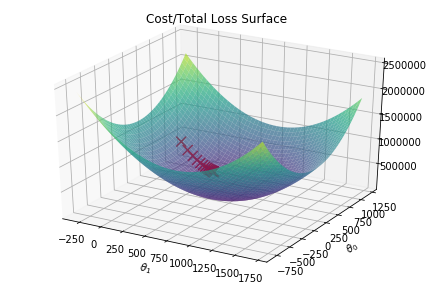

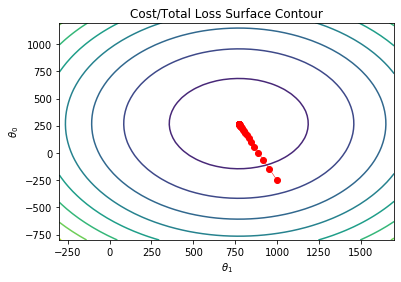

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plot_error_surfaces( [-800,1200], [-300,1700], X2, Y2, train_hist4, 50)

#### TODO: Think about why in this two-parameter model we can set up a relatively larger learning rate, compared with the previous one-parameter model?

#### TODO: Rewrite train_model method, making it supports mini-batch gradient descent

In [38]:
# Redefine a function for Mini-batch gradient
def train_model_2(x, y, nb_of_iterations, init_theta, learning_rate, mini_batch_size):
    theta = init_theta
    m = len(x)
    train_hist = []

    for epoch in range (nb_of_iterations):
        shuffled_indices = np.random.permutation(m)
        x_b_shuffled = x[shuffled_indices]
        y_b_shuffled = y[shuffled_indices]

        for i in range(0, m, mini_batch_size):
            xi = x_b_shuffled[i:i+mini_batch_size]
            yi = y_b_shuffled[i:i+mini_batch_size]

            # Compute gradient
            grad = calculate_gradient(xi, yi, theta)
            grad = grad.reshape(-1,1)
            # Update parameters
            theta = theta - learning_rate * grad.reshape(-1,1)
            # make the prediction using the updated parameters
            y_hat = forward(theta, xi)
            # calculate the loss
            loss = criterion(y_hat, yi)
            # Store the parameter, the gradient, the loss
            train_hist.append((theta.flatten(), calculate_gradient(xi, yi, theta).flatten(), loss))

    return theta, train_hist

Double-click <b>here</b> for the solution
<!--
# Redefine a function for Mini-batch gradient
def train_model_2(X, Y, nb_of_iterations, init_theta, lr, minibatch_size):
    theta = init_theta
    m = len(X)
    train_hist = []
    
    for epoch in range (nb_of_iterations): 
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        Y_b_shuffled = Y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = Y_b_shuffled[i:i+minibatch_size]
            
            # Compute gradient
            grad = gradient(xi,yi,theta)
            grad = grad.reshape(-1,1)
            # Update parameters
            theta = theta - lr*grad.reshape(-1,1)
            # make the prediction using the updated parameters
            Yhat = forward(theta, xi)
            # calculate the loss
            loss = criterion(Yhat,yi)
            # Store the parameter, the gradient, the loss
            train_hist.append((theta.flatten(), gradient(xi,yi,theta).flatten(), loss))
        
    return theta, train_hist
-->       

In [35]:
theta5, train_hist5 = train_model_2(X2,Y2,40,np.array([[1000],[-250]]),0.1,10)

(50, 2)


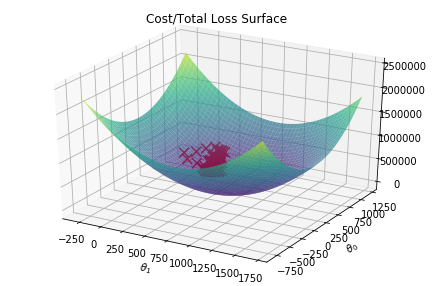

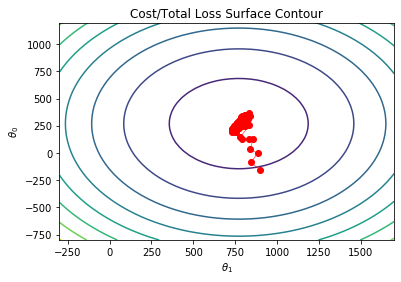

In [36]:
plot_error_surfaces( [-800,1200], [-300,1700], X2, Y2, train_hist5, 50)

#### TODO: BGD vs SGD vs Mini-batch GD
Try different mini_batch_size, such as 1, 20, 50 etc., get the feeling of the differences among SGD, Mini-batch GD, and BGD.